In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
exl = pd.read_excel ('Ds_Anime_1(500 anime).xlsx')
df = pd.DataFrame(exl)
df.head()

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
0,0,Shingeki no Kyojin,"['Action', 'Award Winning', 'Drama', 'Suspense...",TV,8.53,2549906,3569128,2013,24,25,Manga,Wit Studio
1,1,Death Note,"['Supernatural', 'Suspense', 'Psychological', ...",TV,8.62,2515605,3548915,2006,23,37,Manga,Madhouse
2,2,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,9.12,1929885,3024015,2009,24,64,Manga,Bones
3,3,One Punch Man,"['Action', 'Comedy', 'Adult Cast', 'Parody', '...",TV,8.51,2043930,2917437,2015,24,12,Web manga,Madhouse
4,4,Sword Art Online,"['Action', 'Adventure', 'Fantasy', 'Romance', ...",TV,7.20,2008535,2842085,2012,23,25,Light novel,A-1 Pictures


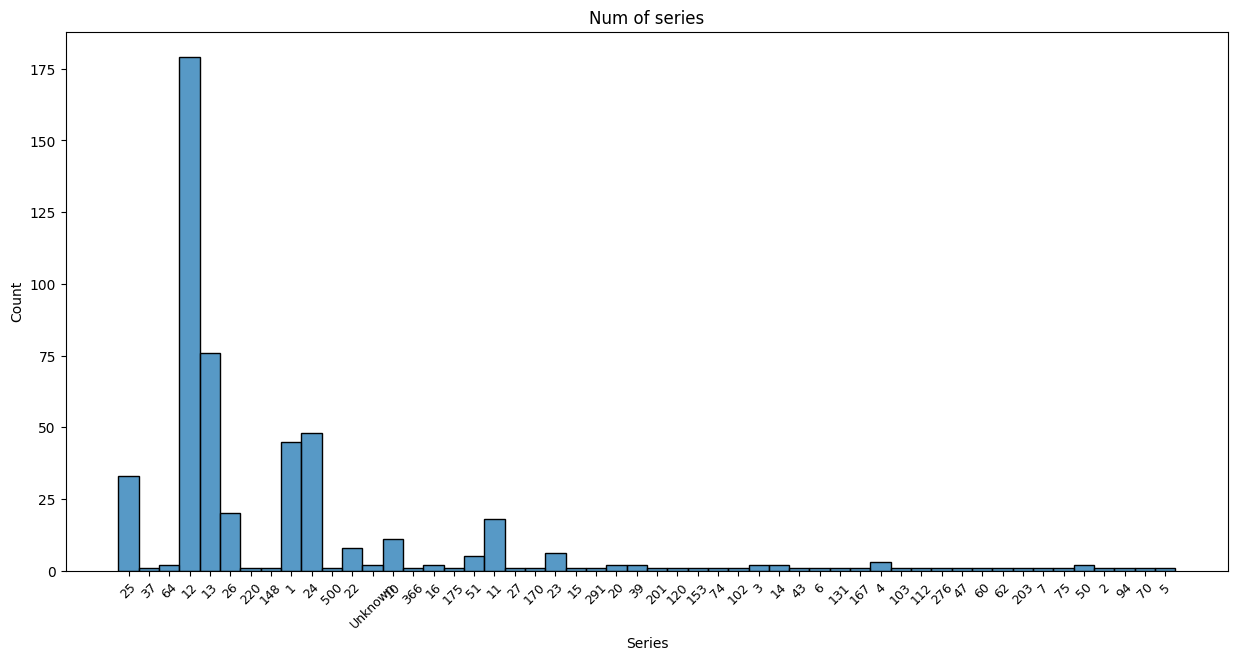

In [12]:
plt.figure(figsize=(15, 7))
sns.histplot(x=df.series, binwidth=0.05)
plt.xlabel('Series')
plt.xticks(rotation=45, size=9)
plt.title('Num of series')
plt.show()

Shortest lenght TV series

In [13]:
df[df.minutes == df.minutes.min()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
138,138,Saiki Kusuo no Ψ-nan,"['Comedy', 'Supernatural', 'Gag Humor', 'Schoo...",TV,8.42,545873,973150,2016,5,120,Manga,"['J.C.Staff', 'Egg Firm']"


Longest anime Movie

In [14]:
df[df.minutes == df.minutes.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
485,485,Kara no Kyoukai Movie 1: Fukan Fuukei,"['Action', 'Mystery', 'Supernatural', 'Suspense']",Movie,7.58,175176,398938,2007,300,1,Light novel,ufotable


Longest anime TV (Unknown - anime has not finished)

In [15]:
df[df.series == df.series.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
22,22,One Piece,"['Action', 'Adventure', 'Fantasy', 'Shounen']",TV,8.67,1146870,2009094,1999,24,Unknown,Manga,Toei Animation
196,196,Boruto: Naruto Next Generations,"['Action', 'Adventure', 'Fantasy', 'Martial Ar...",TV,5.75,392175,782673,2017,23,Unknown,Manga,Pierrot


Best anime

In [16]:
df[df.rating == df.rating.max()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
2,2,Fullmetal Alchemist: Brotherhood,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",TV,9.12,1929885,3024015,2009,24,64,Manga,Bones


Worst anime

In [17]:
df[df.rating == df.rating.min()]

,Unnamed: 0,title,genre,type,rating,votes,views,year,minutes,series,source,studio
172,172,Yakusoku no Neverland 2nd Season,"['Sci-Fi', 'Suspense', 'Psychological', 'Survi...",TV,5.33,418505,838481,2021,22,11,Manga,CloverWorks


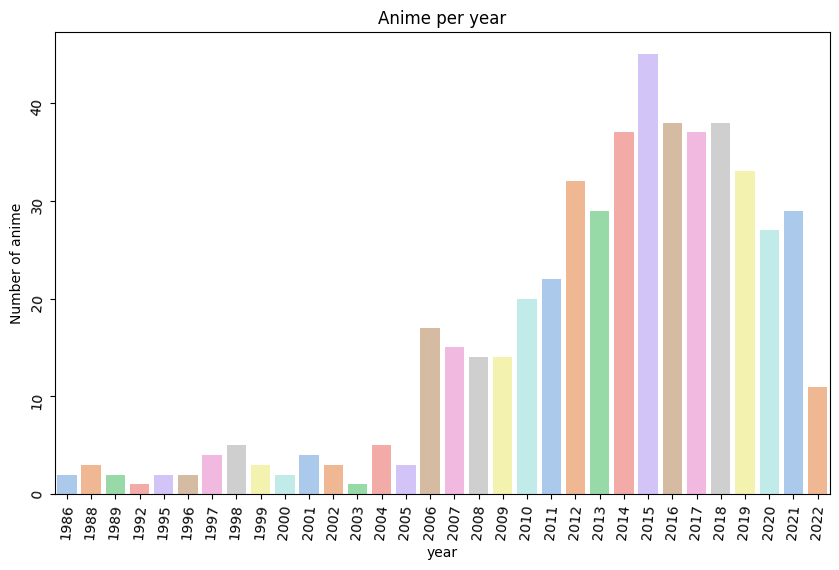

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x= df.year, palette= 'pastel')
plt.title('Anime per year')
plt.ylabel('Number of anime')
plt.tick_params(rotation= 85)
plt.show()

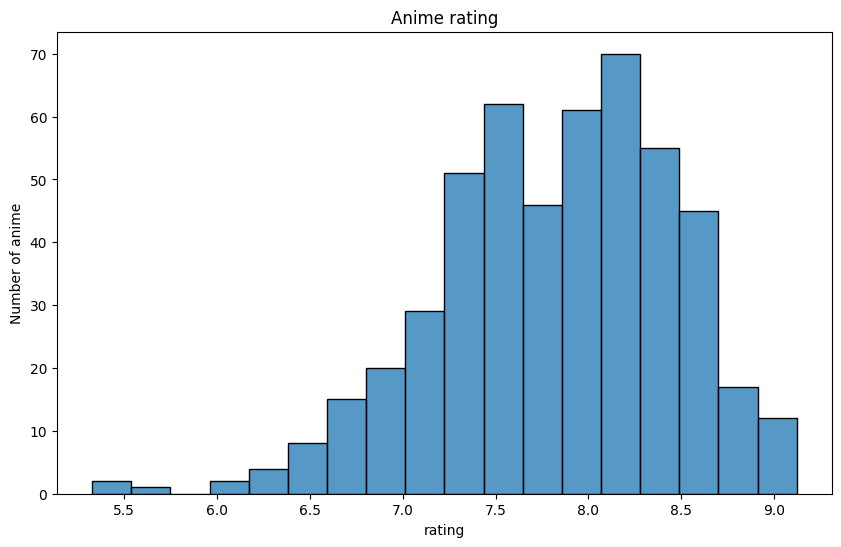

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df.rating)
plt.title('Anime rating')
plt.ylabel('Number of anime')
plt.show()

Word Cloud Titles

<function matplotlib.pyplot.show(close=None, block=None)>

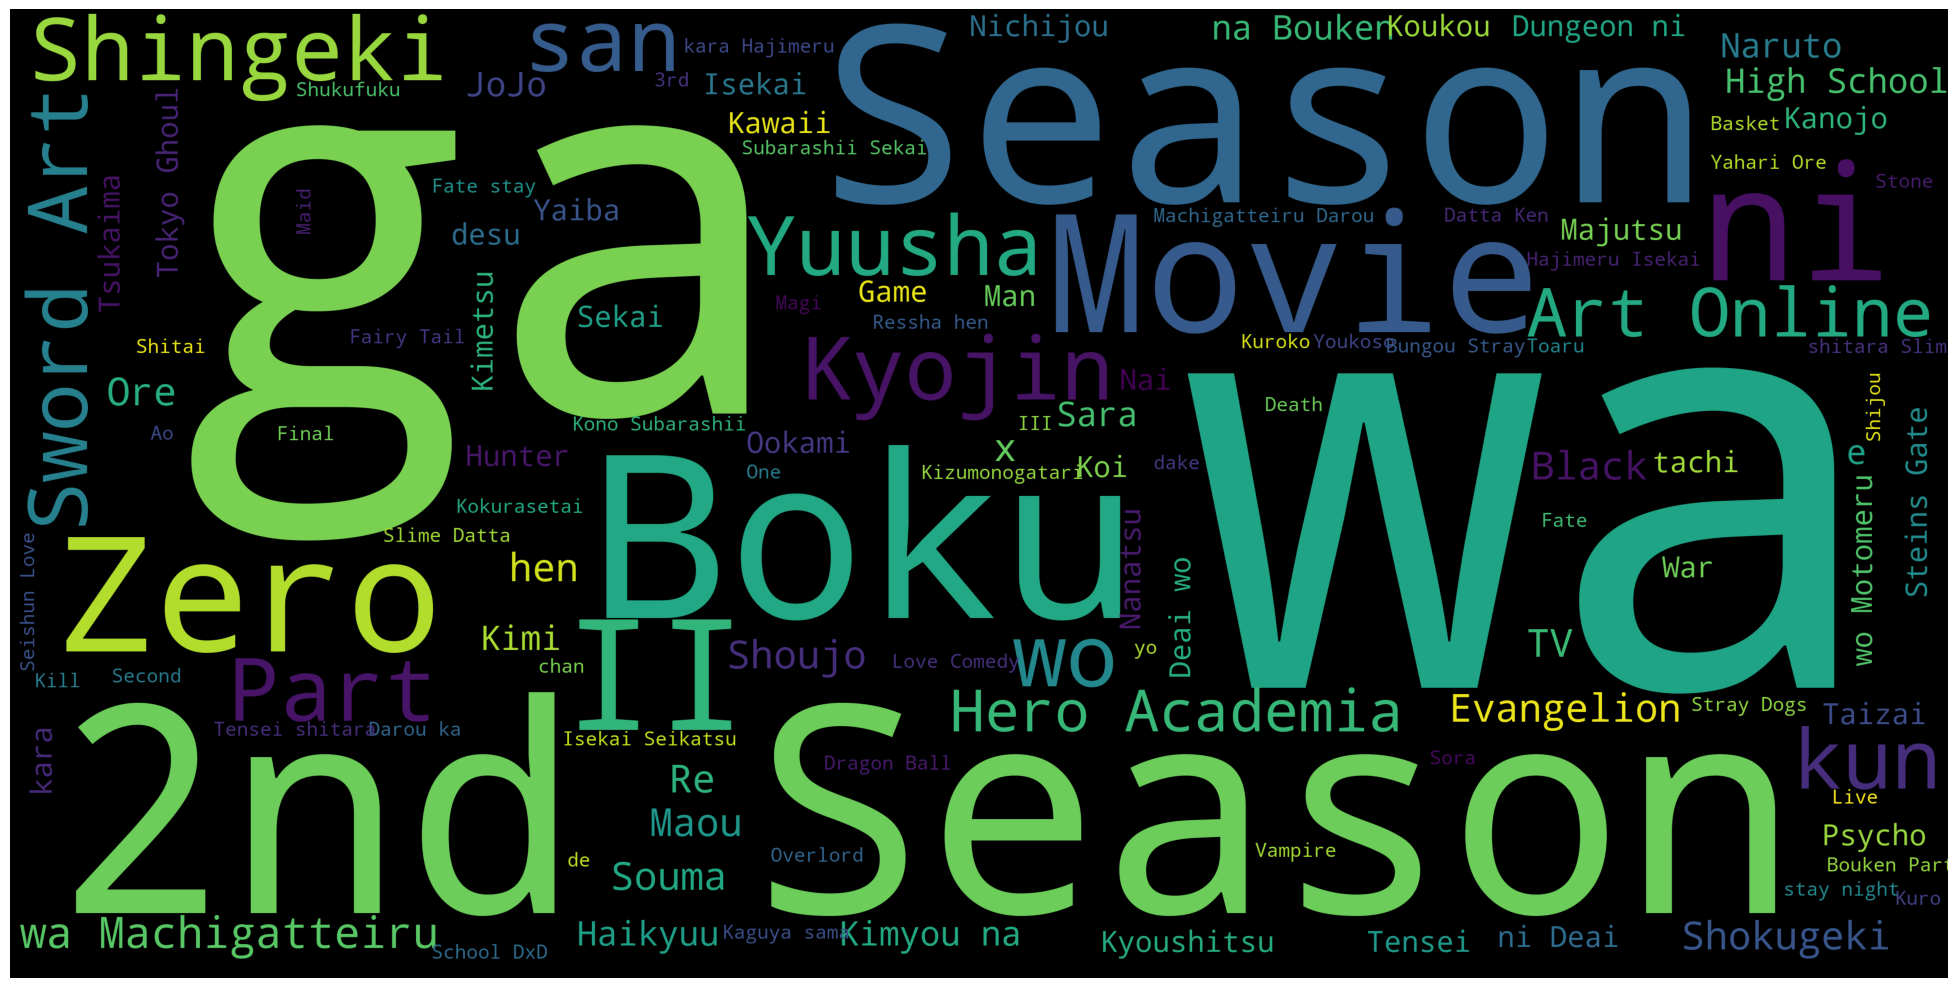

In [20]:
wc= WordCloud(
    max_words= 300,
    scale= 10
)
wc.generate(' '.join(df.title))
plt.figure(figsize=(25, 25))
plt.imshow(wc)
plt.axis('off')
plt.show

Word Cloud Studios

<function matplotlib.pyplot.show(close=None, block=None)>

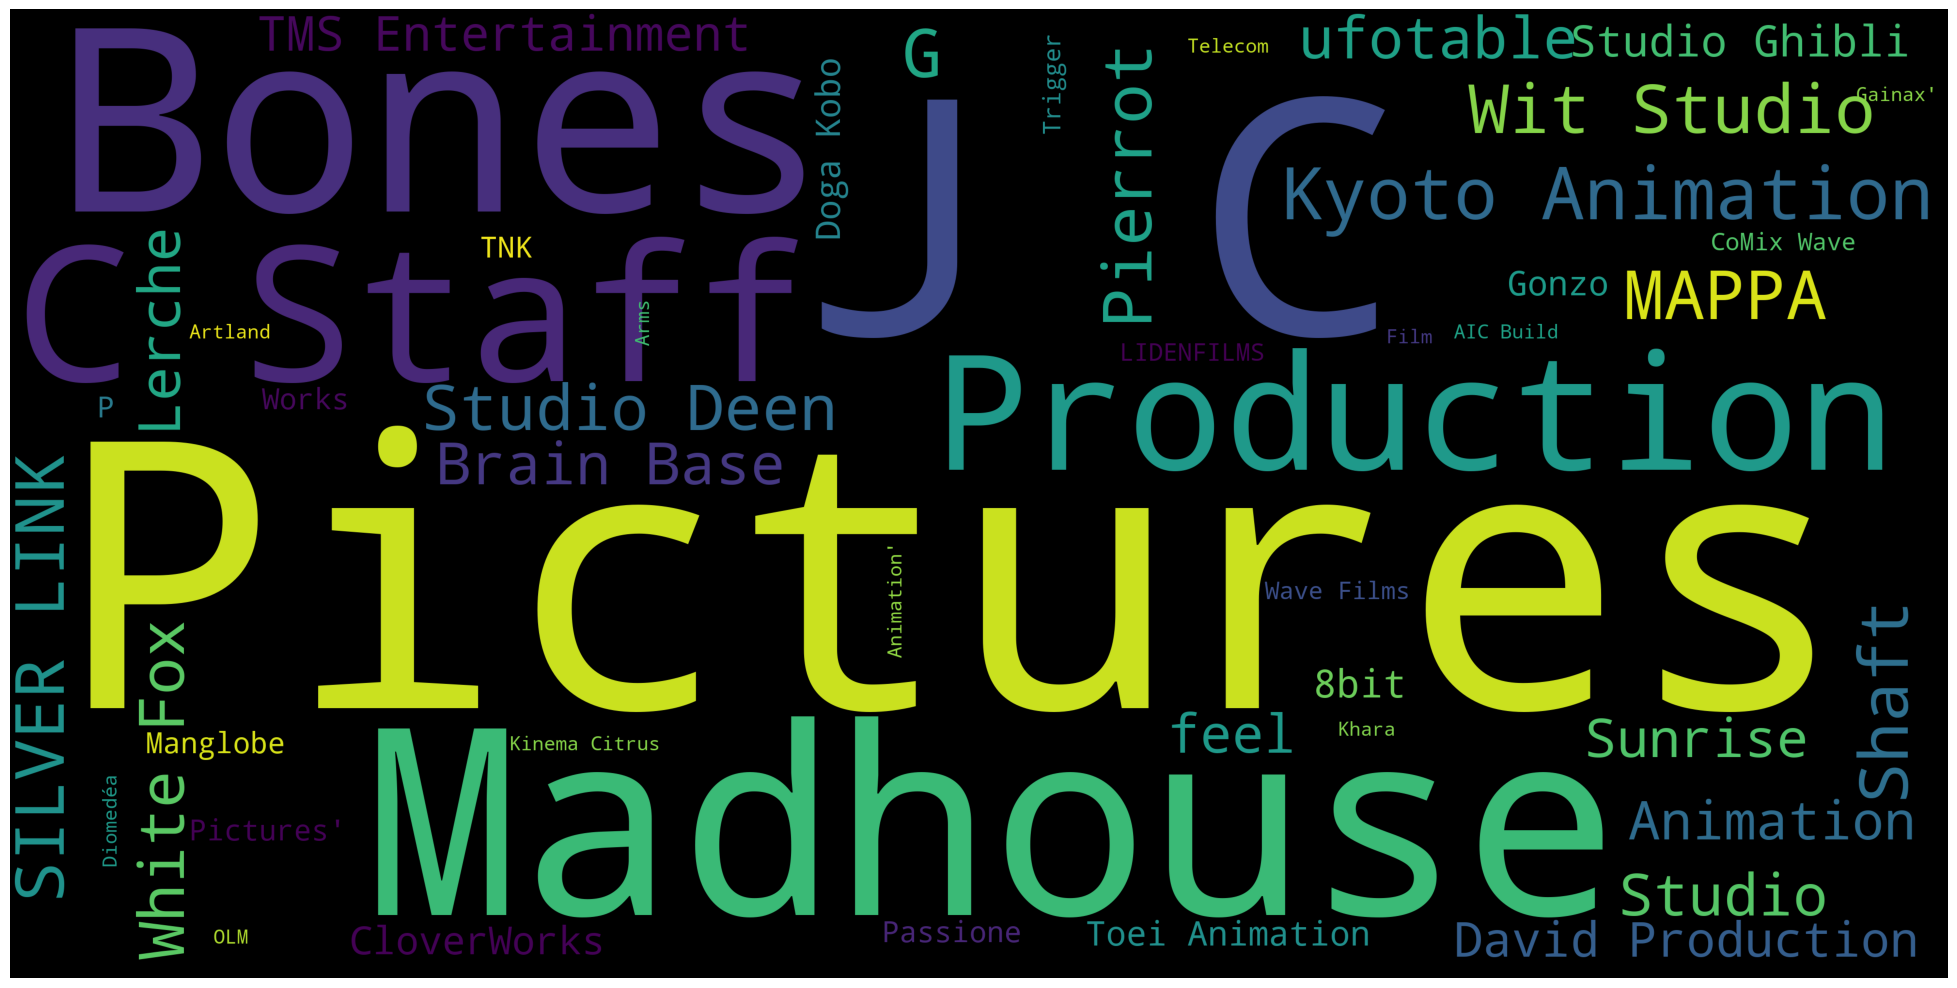

In [21]:
wc= WordCloud(
    max_words= 300,
    scale= 10
)
wc.generate(' '.join(df.studio))
plt.figure(figsize=(25, 25))
plt.imshow(wc)
plt.axis('off')
plt.show

In [24]:
X = df.iloc[:, [ 4, 7]].values

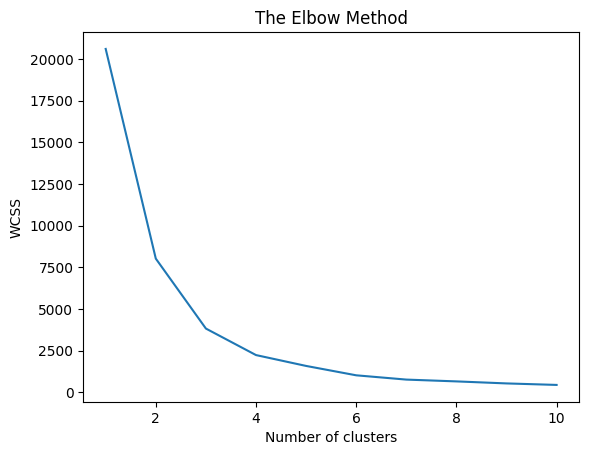

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
wcss
prop = []
for i in range(len(wcss)):
    print(wcss[i])
    if i == 0:
        pass
    elif i > 0:
        prop.append(wcss[i-1]/wcss[i])
prop.sort()
print(prop)
optimal_num_clusters = round(prop[-1])
print(optimal_num_clusters)

20591.768915200002
8022.5641120999235
3830.4485863592854
2241.3282212590843
1590.5299167453431
1028.365775512206
771.6612720283351
663.4858824468515
542.1695909635802
452.20696217575625
[1.163040981644623, 1.1989412731616873, 1.2237607816913152, 1.3326647491445505, 1.4091707409348524, 1.5466577696570423, 1.7090083237373863, 2.0944189515215776, 2.5667316119222714]
3
